In [1]:
# create a thumbnail of an image
from PIL import Image
import matplotlib.pyplot as plt
import keras
import os
from pathlib import Path
from matplotlib import image
from matplotlib import pyplot
import numpy as np
import cv2
import joblib

In [2]:
#Datasets Path
dir_path = './PetImages/'
dir_categories = ['Cat', 'Dog']
desired_size = 55
training_data = []

def read_data_trial():
    for category in dir_categories:
        path = os.path.join(dir_path, category)
        class_category = dir_categories.index(category)
        for item in os.listdir(path):
            image_array = cv2.imread(os.path.join(path,item), cv2.IMREAD_GRAYSCALE)
            print(image_array, class_category)
            plt.imshow(image_array, cmap='gray')
            plt.show()
            break
        break
        
def store_training_data():
    for category in dir_categories:
        path = os.path.join(dir_path, category)
        class_category = dir_categories.index(category)
        for item in os.listdir(path):
            try:
                image_array = cv2.imread(os.path.join(path,item), cv2.IMREAD_GRAYSCALE)
                resized_image = cv2.resize(image_array, (desired_size, desired_size))
                training_data.append([resized_image, class_category])
            except Exception as e:
                pass
            
store_training_data()

In [3]:
print(len(training_data))

24913


In [4]:
import random

random.shuffle(training_data)
for x in training_data[:5]:
    print(x[1])    

0
1
0
0
1


In [5]:
#Split the Data
Features = []
Targets = []

for feature, target in training_data:
    Features.append(feature)
    Targets.append(target)

print(len(Targets))
print(len(Features))


#Features 
Features = np.array(Features).reshape(-1, desired_size, desired_size, 1)
Targets = np.array(Targets)
print(Features.shape)
print(Targets.shape)

24913
24913
(24913, 55, 55, 1)
(24913,)


In [6]:
#Save the Data
np.save(os.path.join('./', 'Feature_Data'), Features)
np.save(os.path.join('./', 'Targets_Data'), Targets)

In [7]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D
from keras.callbacks import EarlyStopping

(24913, 55, 55, 1)
0


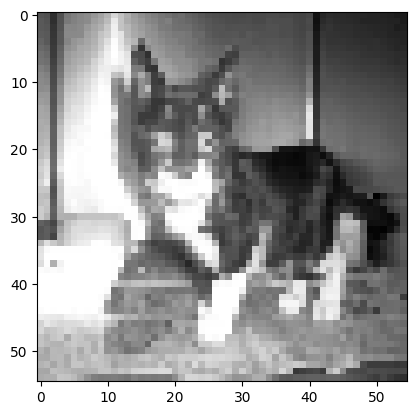

In [8]:
Feature_data = np.load('./Feature_Data.npy')
Target_data = np.load('./Targets_Data.npy')
print(Feature_data.shape)

#Scale the Image shape
Feature_data = Feature_data/255.0
print(Target_data[0])
#print(Feature_data[0])
plt.imshow(Feature_data[0], cmap='gray')

In [9]:
#Defining the model layer
n_features = Feature_data.shape[1:]

#Instantiate the Sequential Model
model = Sequential()

#Add the First Layer
model.add(Conv2D(100,(3,3), activation='relu', input_shape=n_features))
model.add(MaxPooling2D(pool_size=(2,2)))

#Add the Second Layer
model.add(Conv2D(100,(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
          
#Add the Third Layer
model.add(Flatten())
model.add(Dense(100, activation='relu'))

#Add the Output Layer
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer = 'adam',
              loss="binary_crossentropy",
              metrics=['Accuracy'])

#Define an early stopping methods
early_stop = EarlyStopping(patience=3)
model.fit(Feature_data, Target_data, epochs=10, validation_split=0.2, callbacks=[early_stop])

Epoch 1/10
623/623 [==============================] - 151s 240ms/step - loss: 0.6261 - Accuracy: 0.6426 - val_loss: 0.5519 - val_Accuracy: 0.7166
Epoch 2/10
623/623 [==============================] - 146s 234ms/step - loss: 0.5151 - Accuracy: 0.7468 - val_loss: 0.4812 - val_Accuracy: 0.7668
Epoch 3/10
623/623 [==============================] - 151s 243ms/step - loss: 0.4581 - Accuracy: 0.7841 - val_loss: 0.4972 - val_Accuracy: 0.7550
Epoch 4/10
623/623 [==============================] - 152s 243ms/step - loss: 0.4120 - Accuracy: 0.8089 - val_loss: 0.4463 - val_Accuracy: 0.7945
Epoch 5/10
623/623 [==============================] - 139s 223ms/step - loss: 0.3620 - Accuracy: 0.8360 - val_loss: 0.4383 - val_Accuracy: 0.8017
Epoch 6/10
623/623 [==============================] - 164s 264ms/step - loss: 0.3045 - Accuracy: 0.8676 - val_loss: 0.4496 - val_Accuracy: 0.7983
Epoch 7/10
623/623 [==============================] - 146s 235ms/step - loss: 0.2471 - Accuracy: 0.8966 - val_loss: 0.4867 -

In [10]:
#Create a function that reads image path and then return an image plot and prediction of what categories the image is.
# Which is a cat or a dog

def predict_new_image(path):
    try_data_path = path
    try_data = cv2.imread(try_data_path, cv2.IMREAD_GRAYSCALE)
    
    #Resizing the image and reshaping the image so it can pass the Convolutional Layer as a 4D arrays
    resized_try_data = cv2.resize(try_data, (desired_size, desired_size))
    try_data_resized = resized_try_data.reshape(1, desired_size, desired_size, 1)

    #Check the shape of the resized image arrays
    print(try_data_resized.shape)
    plt.imshow(try_data_resized[0], cmap='gray')
    
    #Declare the new data as Xnew
    Xnew = try_data_resized
    # make a prediction using the trained models
    ynew = model.predict(Xnew)
    # show the predicted Outputs
    if ynew[0] == 0:
        print("Predicted=%s" % ('Cat'))
    else:
        print("Predicted=%s" % ('Dog'))


In [11]:
joblib.dump(model,"CatDog.sav")

['CatDog.sav']

(1, 55, 55, 1)
1/1 [==============================] - 0s 22ms/step
Predicted=Cat


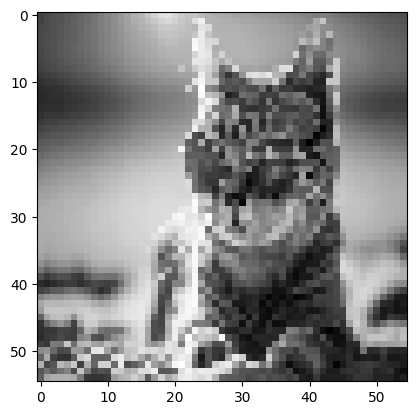

In [13]:
predict_new_image('./TestImage1.jpg')